## Предварительная обрабока полученного датасета

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/runa-tic/Data-Analysys-Project-2024/main/cian_offers.csv', encoding="cp1251")
df

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
0,https://www.cian.ru/sale/flat/301800762/,11000000,297297.0,37,5,19,1,False,2017,18,НАО (Новомосковский),Внуковское поселение
1,https://www.cian.ru/sale/flat/301799226/,8990000,281818.0,31.9,24,25,0,True,2017,7,НАО (Новомосковский),Московский
2,https://www.cian.ru/sale/flat/301797595/,10700000,382143.0,28,11,23,0,True,2021,2,НАО (Новомосковский),Внуковское поселение
3,https://www.cian.ru/sale/flat/301796820/,12550181,299527.0,41.9,11,16,2,False,2024,9,НАО (Новомосковский),Сосенское поселение
4,https://www.cian.ru/sale/flat/301796803/,4985475,353580.0,14.1,7,16,0,True,2026,23,НАО (Новомосковский),Сосенское поселение
...,...,...,...,...,...,...,...,...,...,...,...,...
7773,https://www.cian.ru/sale/flat/300797316/,10300000,268229.0,38.4,13,25,1,False,2017,9,ЮВАО,р-н Некрасовка
7774,https://www.cian.ru/sale/flat/301074964/,11500000,378289.0,30.4,8,9,1,False,1972,14,ЮВАО,р-н Текстильщики
7775,https://www.cian.ru/sale/flat/301035853/,10600000,327160.0,32.4,6,9,1,False,1970,5,ЮВАО,р-н Печатники
7776,https://www.cian.ru/sale/flat/296104063/,9530456,238859.0,39.9,5,26,1,False,2022,14,ЮВАО,р-н Некрасовка


__Получен датасет, содержащий 7778 наблюдений и 12 признаков, по продаже квартир в Москве__

Проведем проверку на дубликаты:


In [3]:
df.duplicated().sum()

465

Удалим дубликаты и сохраним первое наблюдение:

In [4]:
df = df.drop_duplicates(keep = 'first')
df.shape

(7313, 12)

Теперь смотрим на полученный датасет в разрезе переменных, их типов, пропусков:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 7777
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Link           7313 non-null   object 
 1   Price          7313 non-null   int64  
 2   Price per m2   7297 non-null   float64
 3   Square         7313 non-null   object 
 4   Floor          7313 non-null   object 
 5   Floors         7313 non-null   object 
 6   Rooms          7313 non-null   int64  
 7   Is Apartment?  7313 non-null   bool   
 8   Year           7313 non-null   int64  
 9   Time to metro  7313 non-null   object 
 10  Okrug          7313 non-null   object 
 11  District       7313 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 692.7+ KB


Видим, что у некоторых числовых переменных dtype - object, следовательно меняем типы переменных:

In [6]:
df['Square'] = pd.to_numeric(df['Square'], errors='coerce').astype(float)
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce').astype('Int64')  
df['Floors'] = pd.to_numeric(df['Floors'], errors='coerce').astype('Int64') 
df['Time to metro'] = pd.to_numeric(df['Time to metro'], errors='coerce').astype('Int64') 
df = df.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_1836\2016949978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Square'] = pd.to_numeric(df['Square'], errors='coerce').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_1836\2016949978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce').astype('Int64')
C:\Users\User\AppData\Local\Temp\ipykernel_1836\2016949978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 0 to 7777
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Link           7156 non-null   object 
 1   Price          7156 non-null   int64  
 2   Price per m2   7156 non-null   float64
 3   Square         7156 non-null   float64
 4   Floor          7156 non-null   Int64  
 5   Floors         7156 non-null   Int64  
 6   Rooms          7156 non-null   int64  
 7   Is Apartment?  7156 non-null   bool   
 8   Year           7156 non-null   int64  
 9   Time to metro  7156 non-null   Int64  
 10  Okrug          7156 non-null   object 
 11  District       7156 non-null   object 
dtypes: Int64(3), bool(1), float64(2), int64(3), object(3)
memory usage: 698.8+ KB


Удалили строчки с столбцами, в которых не получилось конвертировать данные в нужный тип, либо с пропущенными значениями, таких наблюдений оказалось немного и на итоговый датасет это не влияет.

__Описание полученных итого переменных:__
* `Link` - ссылка на объявление о продаже

* `Price` - цена продажи

* `Price per m2` - цена за квадратный метр

* `Square` - площадь квартиры в квадратных метрах

* `Floor` - этаж квартиры

* `Floors` - всего этажей в доме

* `Rooms` - комнат в квартире

* `Is Apartment?` - является ли квартира апартаментами

* `Year` - год постройки дома

* `Time to metro` - время до метро (в минутах)

* `Okrug` - округ

* `District` - район

Посмотрим еще раз на данные, которые лежат в столбцах:

In [8]:
df.describe()

,Price,Price per m2,Square,Floor,Floors,Rooms,Year,Time to metro
count,7.156000e+03,7.156000e+03,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,2.922736e+07,3.997628e+05,60.382788,8.692566,16.775713,1.940470,1998.889184,10.643097
std,5.382703e+07,2.608955e+05,39.690360,7.642809,11.414930,1.098798,26.385666,5.666290
min,1.300000e+06,2.824100e+04,9.100000,1.000000,1.000000,0.000000,1820.000000,1.000000
25%,1.130000e+07,2.638512e+05,38.000000,3.000000,9.000000,1.000000,1974.000000,6.000000
50%,1.536000e+07,3.251890e+05,50.700000,7.000000,14.000000,2.000000,2010.000000,10.000000
75%,2.500000e+07,4.373418e+05,70.000000,12.000000,22.000000,3.000000,2022.000000,15.000000
max,1.375000e+09,3.676369e+06,779.000000,69.000000,191.000000,5.000000,2028.000000,90.000000


В числовых признаках не видим аномалий, следовательно, датасет готов к дальнейшему анализу, дропнем индексы перед следующим разделом, тк предыдущие преобразования были связаны с удалением строк:

In [9]:
df.reset_index(drop=True)

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
0,https://www.cian.ru/sale/flat/301800762/,11000000,297297.0,37.0,5,19,1,False,2017,18,НАО (Новомосковский),Внуковское поселение
1,https://www.cian.ru/sale/flat/301799226/,8990000,281818.0,31.9,24,25,0,True,2017,7,НАО (Новомосковский),Московский
2,https://www.cian.ru/sale/flat/301797595/,10700000,382143.0,28.0,11,23,0,True,2021,2,НАО (Новомосковский),Внуковское поселение
3,https://www.cian.ru/sale/flat/301796820/,12550181,299527.0,41.9,11,16,2,False,2024,9,НАО (Новомосковский),Сосенское поселение
4,https://www.cian.ru/sale/flat/301796803/,4985475,353580.0,14.1,7,16,0,True,2026,23,НАО (Новомосковский),Сосенское поселение
...,...,...,...,...,...,...,...,...,...,...,...,...
7151,https://www.cian.ru/sale/flat/292524495/,9530456,238859.0,39.9,17,26,1,False,2022,14,ЮВАО,р-н Некрасовка
7152,https://www.cian.ru/sale/flat/300797316/,10300000,268229.0,38.4,13,25,1,False,2017,9,ЮВАО,р-н Некрасовка
7153,https://www.cian.ru/sale/flat/301074964/,11500000,378289.0,30.4,8,9,1,False,1972,14,ЮВАО,р-н Текстильщики
7154,https://www.cian.ru/sale/flat/296104063/,9530456,238859.0,39.9,5,26,1,False,2022,14,ЮВАО,р-н Некрасовка


## Визуализация данных из подготовленного датасета

#### Мы исследуем ценообразование на рынке жилой недвижимости в Москве и хотим проанализировать признаки, влияющие в большей степени на итоговый прайс

Для начала построим гистограмму распределения цены:

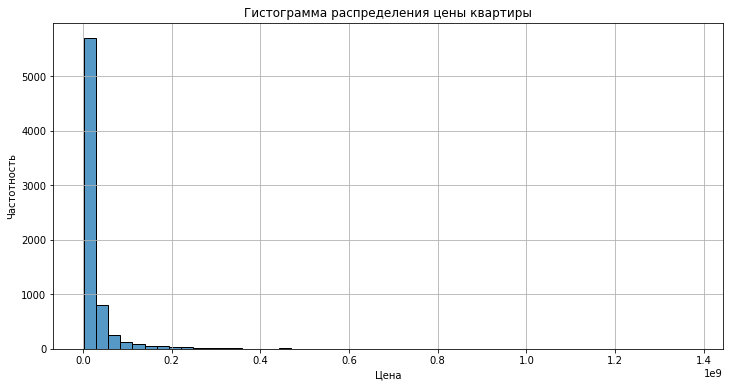

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', bins=50)
plt.title('Гистограмма распределения цены квартиры')
plt.xlabel('Цена')
plt.ylabel('Частотность')
plt.grid(True)
plt.show()

Видим, что основная масса предложений на рынке распределена до 30 млн, и это довольно логично, так как в нашем датасете большинство предложений - 1,2 комнатные квартиры и 3комнатные в меньшей степени, построим ящик с усами, чтобы увидеть взаимосвязь между этими переменными:

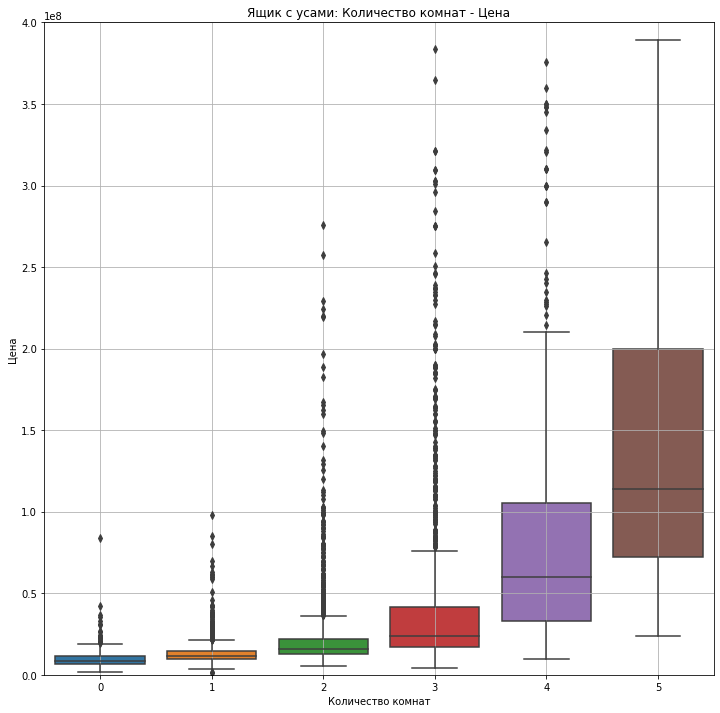

In [11]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='Rooms', y='Price')
plt.title('Ящик с усами: Количество комнат - Цена')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 400000000)
plt.grid(True)

Видна взаимосвязь между количеством комнат и ценой, однако очевидно, что для детального понимания ценообразования стоит рассмотреть все признаки в совокупности. Также очевидно, что количество квадратных метров - более детальная переменная, нежели количество комнат, поэтому построим аналогичный график для метража.

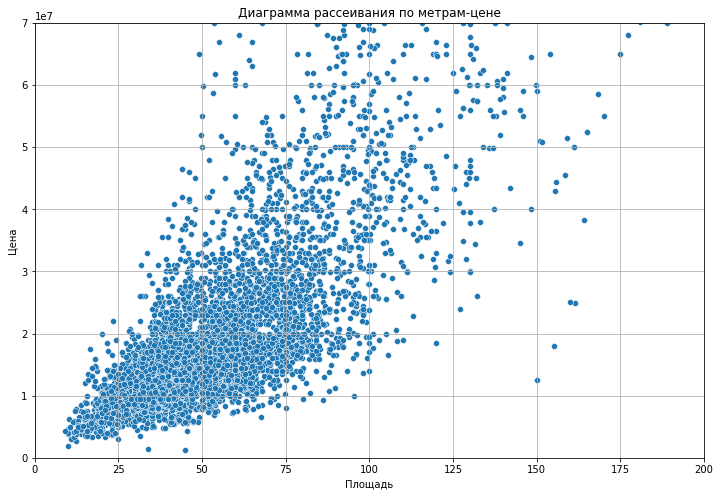

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Square', y='Price')
plt.title('Диаграмма рассеивания по метрам-цене')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.ylim(0, 70000000)
plt.xlim(0, 200)
plt.grid(True)

Видим довольно четкую линейную зависимости между количеством метров и ценой, чего и следовало ожидать, интересно также посмотреть на влияние "время до метро" на цену за квадратный метр:

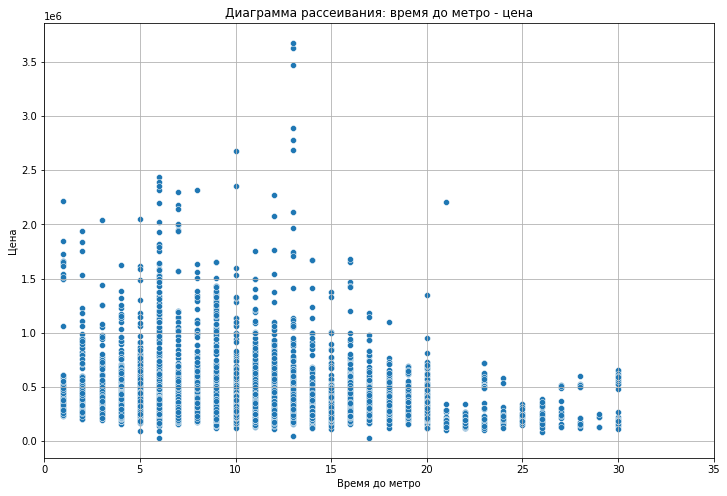

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Time to metro', y='Price per m2')
plt.xlim(0, 35)
plt.xlabel('Время до метро')
plt.ylabel('Цена')
plt.title('Диаграмма рассеивания: время до метро - цена')
plt.grid(True)

Логично было бы утверждать, что время до метро обратно пропорционально влияет на стоимость квартиры, однако по диаграмме видно отсутствие зависимости, для проверки этого, а также влияния прочих численных признаков на цену, интересно посмотреть на

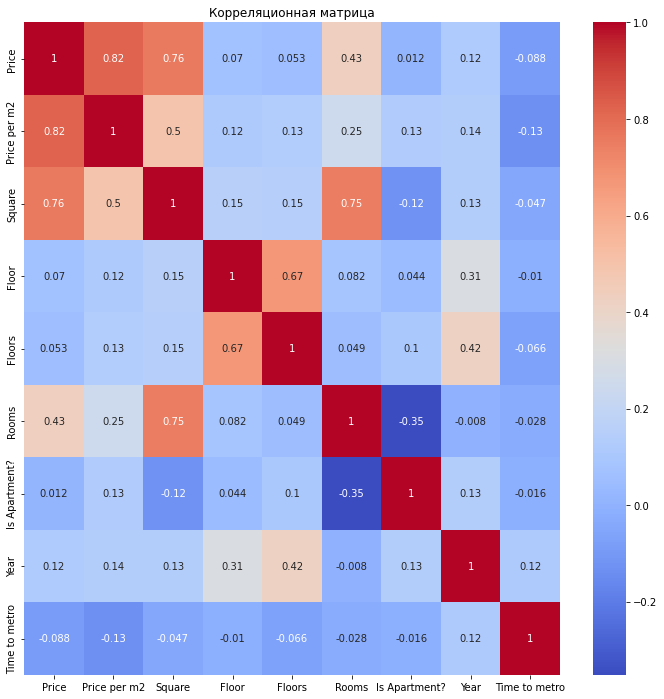

In [14]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(12, 12))
plt.title('Корреляционная матрица')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

__Вывод:__ по матрице видим, что на цену:
* стоимость за квадратный метр оказывает сильное положительное влияние
* площадь оказывает сильное положительное влияние
* количество комнат оказывает умеренное положительное влияние
* остальные признаки оказывают слабое положительное влияние

С помощью корреляционной матрицы мы определили, как числовые переменные влияют на ценообразование, однако у нас есть и категориальные переменные, которые также необходимо проанализировать:

Text(0, 0.5, 'Цена за квадратный метр')

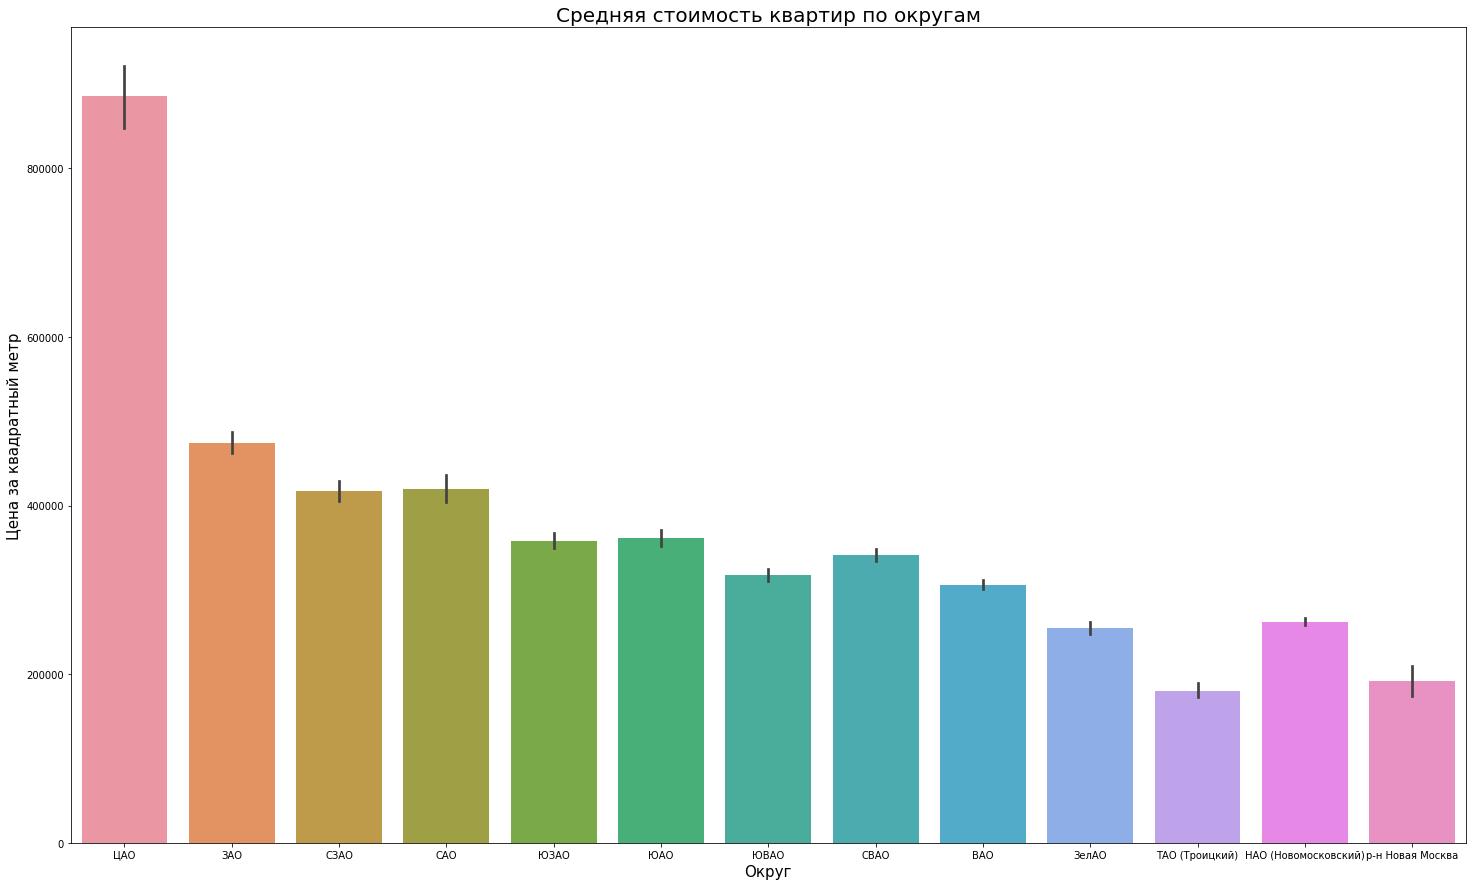

In [15]:
plt.figure(figsize=(25, 15));
sns.barplot(data = df.sort_values('Price per m2', ascending = False), x = 'Okrug', y = 'Price per m2')
plt.title('Средняя стоимость квартир по округам', fontsize = 20)
plt.xlabel('Округ', fontsize = 15)
plt.ylabel('Цена за квадратный метр', fontsize = 15)

Вывод по графику: видно, что наиболее высокая стоимость за квадратный метр наблюдается в ЦАО и ЗАО, которые считаются престижными округами Москвы, что и делает их самыми дорогими, в качестве дальнейшей гипотезы проверим, одинакова ли дисперсия в этих округах

Интересно копнуть дальше в сторону анализа округов и посмотреть есть ли зависимость от времени до метро:

Text(0, 0.5, 'Вемя до метро, мин')

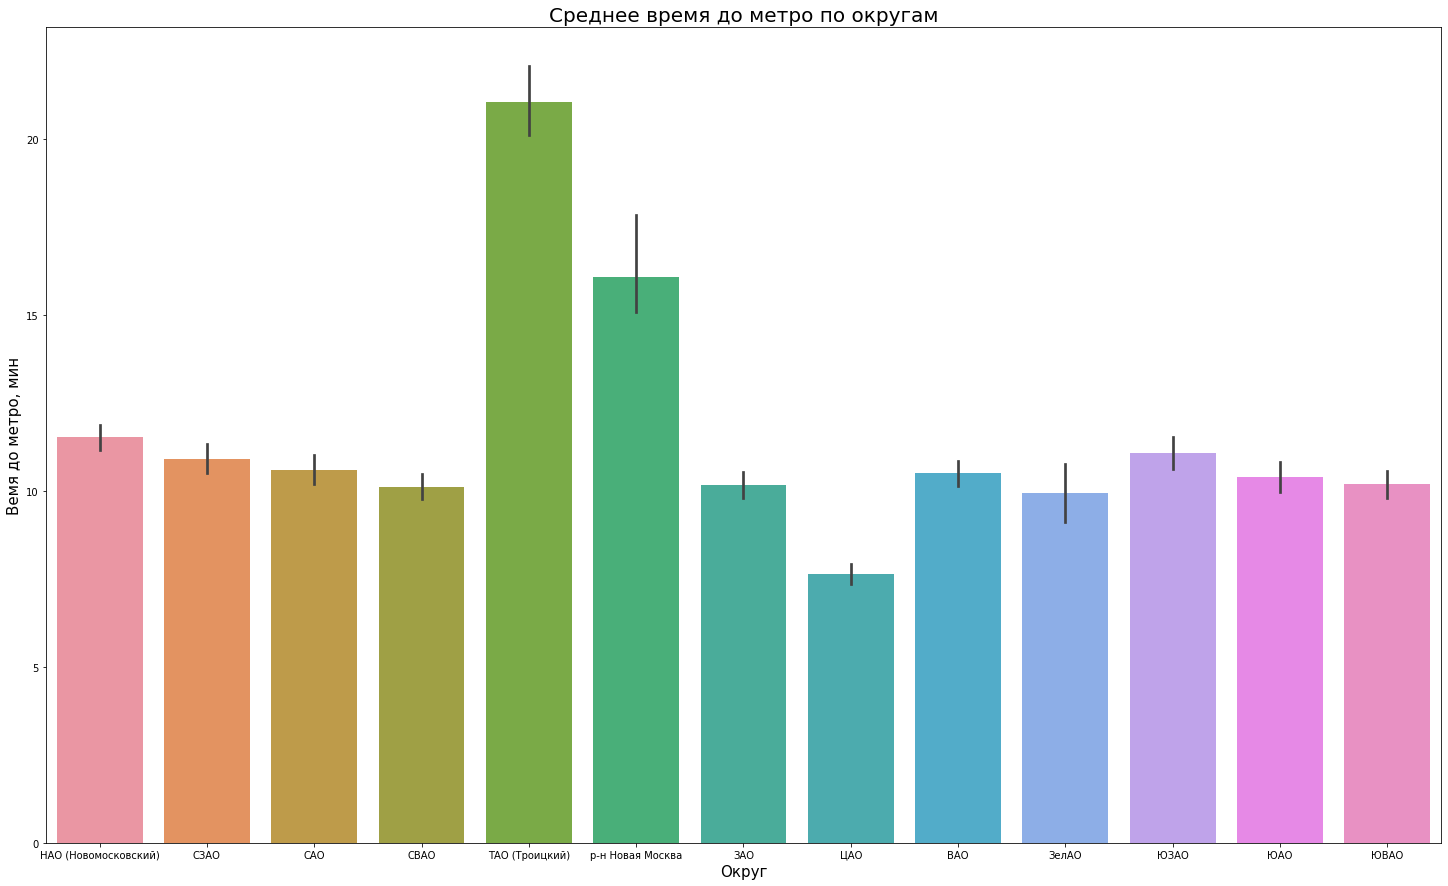

In [16]:
plt.figure(figsize=(25, 15));
sns.barplot(data = df, x = 'Okrug', y = 'Time to metro')
plt.title('Среднее время до метро по округам', fontsize = 20)
plt.xlabel('Округ', fontsize = 15)
plt.ylabel('Вемя до метро, мин', fontsize = 15)

На графике видно, что по самому высокому времени до метро лидируют ТАО и р-н Новая Москва, что абсолютно логично, так как это два единственных административных округа, которые образованы в 2012 году в процессе расширения территории города, и следовательно, метро только развивается в ту сторону, и наименее развито на данный момент.

Более того, лидирует по самому низкому времени до метро ЦАО, что также логично, так как в центре Москвы сконцетрированы множество станций для удобства перемещения по центру.

## Создание новых признаков

#### В качестве гипотезы мы хотим проверить есть ли дисконт за проживание на первом этаж/последнем этаже, для этого создадим 2 дополнительных бинарных столбца:

In [17]:
def IsLastFloor(row):
    if row['Floor'] == row['Floors']:
        return 1
    else:
        return 0
    
def IsFirstFloor(row):
    if row['Floor'] == 1:
        return 1
    else:
        return 0

In [18]:
df['IsLastFloor'] = df.apply(IsLastFloor, axis=1)
df['IsFirstFloor'] = df.apply(IsFirstFloor, axis=1)

Проверим корректность отработки кода

In [19]:
df_last_floor = df[df['IsLastFloor'] == 1]

In [20]:
df_first_floor = df[df['IsFirstFloor'] == 1]

## Гипотезы

#### Гипотезы:
1. Есть дисконт в стоимости квартиры на последнем этаже
2. Есть дисконт в стоимости квартиры на первом этаже
3. В апартаментах стоимость квадратного метра меньше чем в квартире
4. В более новых домах по году постройки этажность больше

#### Гипотеза 1
Есть дисконт в стоимости квартиры на последнем этаже

Создаем переменную с датасетом, который содержит предложения квартир, не находящихся на последнем этаже, и не находящихся на первом этаже

In [21]:
df_middle_floor = df[(df['IsLastFloor'] == 0) & (df['IsFirstFloor'] == 0)]

In [22]:
x = df_middle_floor['Price'].median()
y = df_last_floor['Price'].median()

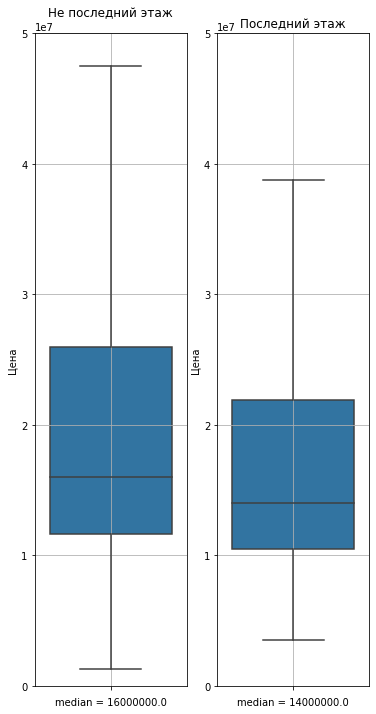

In [23]:
plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_middle_floor, y='Price', showfliers = False)
plt.title('Не последний этаж')
plt.xlabel(f'median = {round(x,2)}')
plt.ylabel('Цена')
plt.xlim(-0.5, 0.5)
plt.ylim(0,50000000)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_last_floor, y='Price', showfliers = False)
plt.title('Последний этаж')
plt.xlabel(f'median = {round(y,2)}')
plt.ylabel('Цена')
plt.xlim(-0.5, 0.5)
plt.ylim(0,50000000)
plt.grid(True)

__Вывод:__ гипотеза подтвердилась, видим дисконт по боксплотам и медианам для выборки, содержащей предложения квартир на последнем этаже, также взяли медиану, как ориентир, так как она менее подвержена выбросам, чем средняя.

#### Гипотеза 2
Есть дисконт в стоимости квартиры на первом этаже

In [24]:
x = df_middle_floor['Price'].median()
y = df_first_floor['Price'].median()

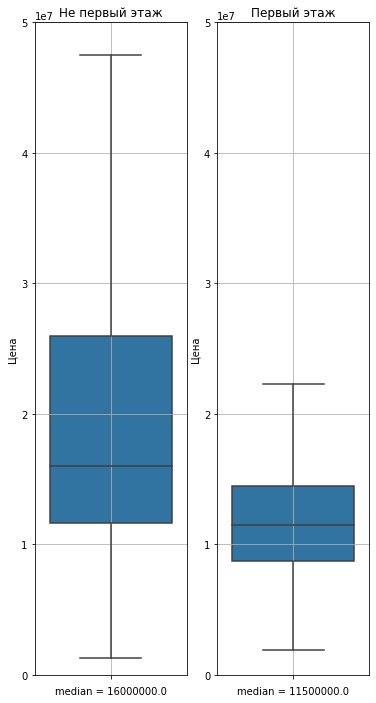

In [25]:
plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_middle_floor, y='Price', showfliers = False)
plt.title('Не первый этаж')
plt.xlabel(f'median = {round(x,2)}')
plt.ylabel('Цена')
plt.xlim(-0.5, 0.5)
plt.ylim(0,50000000)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_first_floor, y='Price', showfliers = False)
plt.title('Первый этаж')
plt.xlabel(f'median = {round(y,2)}')
plt.ylabel('Цена')
plt.xlim(-0.5, 0.5)
plt.ylim(0,50000000)
plt.grid(True)

__Вывод:__ гипотеза подтвердилась, видим дисконт по боксплотам и медианам для выборки, содержащей предложения квартир на первом этаже, также взяли медиану, как ориентир, так как она менее подвержена выбросам, чем средняя, также видим, что дисконт для первого этажа сильнее, чем дисконт для последнего этажа

#### Гипотеза 3
В апартаментах стоимость квадратного метра меньше чем в квартире.

In [26]:
df_not_apartment = df[df['Is Apartment?'] == False]
df_apartment = df[df['Is Apartment?'] == True]

In [27]:
x = df_not_apartment['Price per m2'].median()
y = df_apartment['Price per m2'].median()

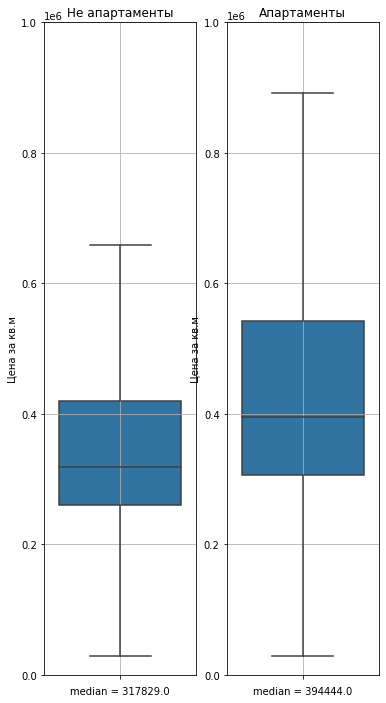

In [28]:
plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_not_apartment, y='Price per m2', showfliers = False)
plt.title('Не апартаменты')
plt.xlabel(f'median = {round(x,2)}')
plt.ylabel('Цена за кв.м')
plt.xlim(-0.5, 0.5)
plt.ylim(0,1000000)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_apartment, y='Price per m2', showfliers = False)
plt.title('Апартаменты')
plt.xlabel(f'median = {round(y,2)}')
plt.ylabel('Цена за кв.м')
plt.xlim(-0.5, 0.5)
plt.ylim(0, 1000000)
plt.grid(True)

Видим, что стоимость апартаментов за квадратный метр больше, как и медиана, больше, что довольно странно, проанализируем, с чем это может быть связано: сначала попробуем посмотреть, есть ли у нас смещенность относительно округов в сторону более дорогих для апартаментов:

In [29]:
a = df_apartment['Okrug'].value_counts()['ЦАО']/df_apartment.shape[0] * 100
print(f'Процент квартир ЦАО по апартаментам: {a}')

Процент квартир ЦАО по апартаментам: 19.751809720785936


In [30]:
a = df_not_apartment['Okrug'].value_counts()['ЦАО']/df_not_apartment.shape[0] * 100
print(f'Процент квартир ЦАО по апартаментам: {a}')

Процент квартир ЦАО по апартаментам: 8.191953465826467


Видим, что действительно, апартаментов в 2 раза больше в ЦАО в нашем датасете, нежели в выборке по не апартаментам, следовательно, проведем тестирование гипотезы вне ЦАО

In [31]:
df_not_apartment_not_cao = df[(df['Is Apartment?'] == False) & (df['Okrug'] != 'ЦАО')]
df_apartment_not_cao = df[(df['Is Apartment?'] == True) & (df['Okrug'] != 'ЦАО')]

In [32]:
x = df_not_apartment_not_cao['Price per m2'].median()
y = df_apartment_not_cao['Price per m2'].median()

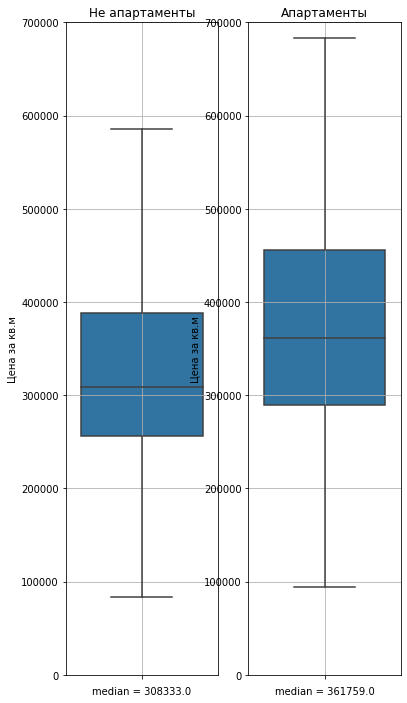

In [33]:
plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_not_apartment_not_cao, y='Price per m2', showfliers = False)
plt.title('Не апартаменты')
plt.xlabel(f'median = {round(x,2)}')
plt.ylabel('Цена за кв.м')
plt.xlim(-0.5, 0.5)
plt.ylim(0,700000)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_apartment_not_cao, y='Price per m2', showfliers = False)
plt.title('Апартаменты')
plt.xlabel(f'median = {round(y,2)}')
plt.ylabel('Цена за кв.м')
plt.xlim(-0.5, 0.5)
plt.ylim(0, 700000)
plt.grid(True)

__Вывод:__ гипотеза не подтвердилась, видим премию за стоимость квадратного метра в апартаментах вне ЦАО

#### Гипотеза 4

В более новых домах по году постройки этажность больше

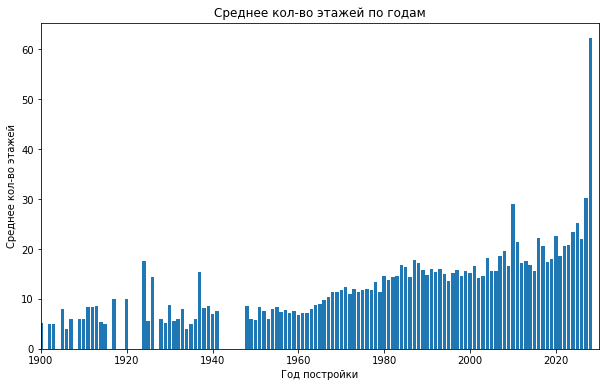

In [34]:
average_floors_by_year = df.groupby('Year')['Floors'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_floors_by_year['Year'], average_floors_by_year['Floors'])
plt.xlabel('Год постройки')
plt.ylabel('Среднее кол-во этажей')
plt.title('Среднее кол-во этажей по годам')
plt.xlim(1900, 2030)

plt.show()

__Вывод:__ гипотеза подтвердилась, видим увеличение количества этажей в домах с каждым новым годом

## ML

Для начала подготовим датасет для обучения модели, переведем категориальные переменные в дамми

In [35]:
df_new = df.drop(columns = ['Link', 'Price per m2', 'IsLastFloor', 'IsFirstFloor'])
df_new

,Price,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
0,11000000,37.0,5,19,1,False,2017,18,НАО (Новомосковский),Внуковское поселение
1,8990000,31.9,24,25,0,True,2017,7,НАО (Новомосковский),Московский
2,10700000,28.0,11,23,0,True,2021,2,НАО (Новомосковский),Внуковское поселение
3,12550181,41.9,11,16,2,False,2024,9,НАО (Новомосковский),Сосенское поселение
4,4985475,14.1,7,16,0,True,2026,23,НАО (Новомосковский),Сосенское поселение
...,...,...,...,...,...,...,...,...,...,...
7772,9530456,39.9,17,26,1,False,2022,14,ЮВАО,р-н Некрасовка
7773,10300000,38.4,13,25,1,False,2017,9,ЮВАО,р-н Некрасовка
7774,11500000,30.4,8,9,1,False,1972,14,ЮВАО,р-н Текстильщики
7776,9530456,39.9,5,26,1,False,2022,14,ЮВАО,р-н Некрасовка


In [36]:
var_real = ['Floor', 'Floors', 'Rooms', 'Price', 'Square', 'Time to metro', 'Year']
var_cat = ['Is Apartment?', 'Okrug', 'District']
df_ohe = pd.get_dummies(df_new, columns = var_cat, drop_first = True)
df_ohe

,Price,Square,Floor,Floors,Rooms,Year,Time to metro,Is Apartment?_True,Okrug_ЗАО,Okrug_ЗелАО,...,District_р-н Чертаново Южное,District_р-н Щукино,District_р-н Южное Бутово,District_р-н Южное Медведково,District_р-н Южное Тушино,District_р-н Южнопортовый,District_р-н Якиманка,District_р-н Ярославский,District_р-н Ясенево,District_ул. Усадебный Парк
0,11000000,37.0,5,19,1,2017,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8990000,31.9,24,25,0,2017,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10700000,28.0,11,23,0,2021,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12550181,41.9,11,16,2,2024,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4985475,14.1,7,16,0,2026,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,9530456,39.9,17,26,1,2022,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7773,10300000,38.4,13,25,1,2017,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7774,11500000,30.4,8,9,1,1972,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7776,9530456,39.9,5,26,1,2022,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


На этом этапе разделим выборку на трейн и тест с 80% разделением:

In [37]:
train_df, test_df = train_test_split(df_ohe, test_size=0.2)

In [38]:
X_train = train_df.drop(columns=['Price'])
y_train = train_df['Price']

X_test = test_df.drop(columns=['Price'])
y_test = test_df['Price']

Далее нормализуем переменные через минмакс скеллер

In [39]:
columns = X_train.columns
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=columns, index=X_test.index)

In [40]:
X_train_scaled

,Square,Floor,Floors,Rooms,Year,Time to metro,Is Apartment?_True,Okrug_ЗАО,Okrug_ЗелАО,Okrug_НАО (Новомосковский),...,District_р-н Чертаново Южное,District_р-н Щукино,District_р-н Южное Бутово,District_р-н Южное Медведково,District_р-н Южное Тушино,District_р-н Южнопортовый,District_р-н Якиманка,District_р-н Ярославский,District_р-н Ясенево,District_ул. Усадебный Парк
519,0.023120,0.044118,0.093023,0.0,0.947368,0.134831,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6466,0.032991,0.176471,0.174419,0.2,0.750000,0.033708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7104,0.062606,0.000000,0.046512,0.4,0.532895,0.022472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3493,0.044032,0.044118,0.151163,0.4,0.953947,0.044944,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3883,0.124951,0.411765,0.860465,0.4,0.881579,0.011236,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,0.048188,0.161765,0.209302,0.4,0.953947,0.089888,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7013,0.126029,0.073529,0.209302,0.6,0.973684,0.044944,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4777,0.037537,0.029412,0.127907,0.4,0.592105,0.067416,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7474,0.070009,0.044118,0.186047,0.4,0.907895,0.033708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Попробуем для начала обучить линейную регрессию

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test_scaled)
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

2011314036.112129

Получаем какой-то бред, мапе прыгает то в 5млн (как вообще мапе может быть больше 1), то в 1.2, пробовали отключить совсем категориальные переменные, либо отключить нормализацию, либо нормализовывать через стандартскеллер, ничего не помогло, мапе отдыхает

Попробуем обучить Ridge регрессию, возможно переобучаемся

Best alpha = 0.3793


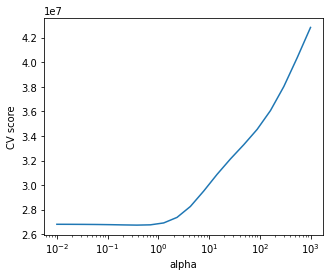

In [43]:
alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

Получаем еще и никакую альфу(

__Вывод:__ сильная модель, уверенная